In [1]:
from utils import random_routing_instance, solve_vrp, compare_solvers

n=8     # number of clients
m=3     # number of vehicles

cost, xc, yc = random_routing_instance(n, seed=100)

In [2]:
### Select the type of model to solve VRP
#    1: Constrained Quadratic Model - 
#    2: Binary Quadratic Model - 
model = 'CQM'


### Select solver
#    1: RAS (Route Activation Solver)
#    2: FQS (Full QUBO Solver)
#    3: GPS (Guillermo, Parfait, Saúl) (only using CQM)
#    4: DBSCANS (Density-Based Spatial Clustering of Applications with Noise - Solver)
#    5: SPS (Solution Partition Solver)
solver = 'ras'


ROUTE ACTIVATION SOLVER (Constrained Quadratic Model)
31 feasible solutions of 52.
Minimum total cost: 7784.0
Number of variables: 104
Runtime: 4997.349 ms


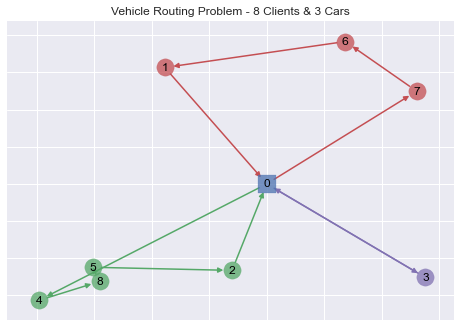

In [3]:
solve_vrp(n, m, cost, xc, yc, model=model, solver=solver)

In [3]:
# Number of iterations to get the average approximation ratio for a particular solver
# Warning! More iterations will take more time and resources to run
n_iter = 1

In [4]:
comparison_table = compare_solvers(n, m, cost, xc, yc, n_iter=n_iter)


EXACT (CLASSICAL) SOLVER
Minimum cost: 7659.0
Time taken to solve: 280.919 ms

ROUTE ACTIVATION SOLVER (Constrained Quadratic Model)
38 feasible solutions of 57.
Minimum total cost: 8077.0
Number of variables: 104
Runtime: 5003.632 ms

FULL QUBO SOLVER (Constrained Quadratic Model)
48 feasible solutions of 53.
Minimum total cost: 8027.0
Number of variables: 192
Runtime: 5052.334 ms

GUILLERMO, PARFAIT, SAÚL SOLVER (Constrained Quadratic Model)
2 feasible solutions of 33.
Minimum total cost: 13089.0
Number of variables: 704
Runtime: 4978.461 ms


In [5]:
for solver_id in comparison_table:
  print(f'{solver_id}:', '\t', f'average min cost = {comparison_table[solver_id]["average min cost"]}',
                         '\t', f'average runtime = {comparison_table[solver_id]["average runtime"]}',
                         '\t', f'number of variables = {comparison_table[solver_id]["number of variables"]}',
                         '\t', f'approximation ratio = {comparison_table[solver_id]["approximation ratio"]}'
  )

RAS: 	 average min cost = 8077.0 	 average runtime = 5003.632 	 number of variables = 104 	 approximation ratio = 1.0545763154458807
FQS: 	 average min cost = 8027.0 	 average runtime = 5052.334 	 number of variables = 192 	 approximation ratio = 1.048048048048048
GPS: 	 average min cost = 13089.0 	 average runtime = 4978.461 	 number of variables = 704 	 approximation ratio = 1.708969839404622
